In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [42]:

colnames = ['native_english_speaker', 'course_instructor', 'course', 'summer_or_regular','class_size', 'class_attribute']
df = pd.read_csv("data.csv", header=None, names=colnames)
df.head()

,native_english_speaker,course_instructor,course,summer_or_regular,class_size,class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   native_english_speaker  151 non-null    int64
 1   course_instructor       151 non-null    int64
 2   course                  151 non-null    int64
 3   summer_or_regular       151 non-null    int64
 4   class_size              151 non-null    int64
 5   class_attribute         151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [44]:
df.describe()

,native_english_speaker,course_instructor,course,summer_or_regular,class_size,class_attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [45]:
print(df['native_english_speaker'].value_counts())
print(df['course_instructor'].value_counts())
print(df['course'].value_counts())
print(df['summer_or_regular'].value_counts())
print(df['class_size'].value_counts())
print(df['class_attribute'].value_counts())

2    122
1     29
Name: native_english_speaker, dtype: int64
23    17
13    14
22    12
7     11
9      8
10     8
18     8
6      8
15     8
14     8
5      6
20     5
8      5
16     4
17     4
1      4
2      4
25     4
11     3
21     2
4      2
12     2
3      2
24     1
19     1
Name: course_instructor, dtype: int64
3     45
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
25     3
9      3
21     3
13     3
22     3
16     3
18     2
6      2
14     1
12     1
19     1
23     1
26     1
24     1
20     1
4      1
10     1
Name: course, dtype: int64
2    128
1     23
Name: summer_or_regular, dtype: int64
19    11
20    11
42     7
27     7
17     6
38     6
37     6
31     6
29     6
10     6
24     5
13     4
11     4
30     4
21     4
48     3
39     3
25     3
23     3
22     3
51     3
36     3
45     2
18     2
14     2
15     2
12     2
28     2
46     2
9      2
58     2
55     2
33     2
43     2
49     2
7      1
5      1
44     1
16     1
54     1

In [46]:
print(df.corr())

                        native_english_speaker  course_instructor    course  \
native_english_speaker                1.000000          -0.250510  0.134660   
course_instructor                    -0.250510           1.000000 -0.236010   
course                                0.134660          -0.236010  1.000000   
summer_or_regular                     0.214417          -0.168573  0.224927   
class_size                           -0.151547          -0.035765 -0.033485   
class_attribute                      -0.255466           0.075095  0.143103   

                        summer_or_regular  class_size  class_attribute  
native_english_speaker           0.214417   -0.151547        -0.255466  
course_instructor               -0.168573   -0.035765         0.075095  
course                           0.224927   -0.033485         0.143103  
summer_or_regular                1.000000    0.269554        -0.282742  
class_size                       0.269554    1.000000        -0.035676  
class_at

In [47]:
print(df.isna().sum())

native_english_speaker    0
course_instructor         0
course                    0
summer_or_regular         0
class_size                0
class_attribute           0
dtype: int64


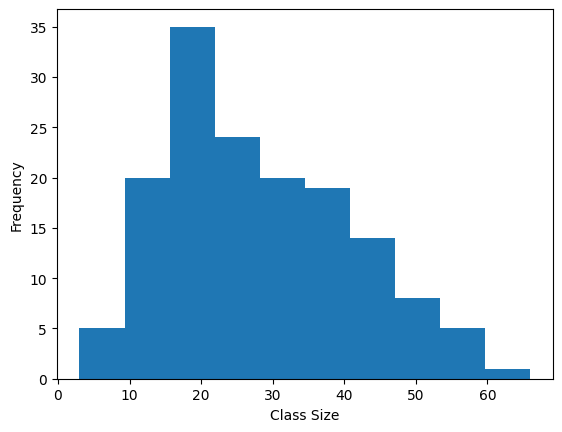

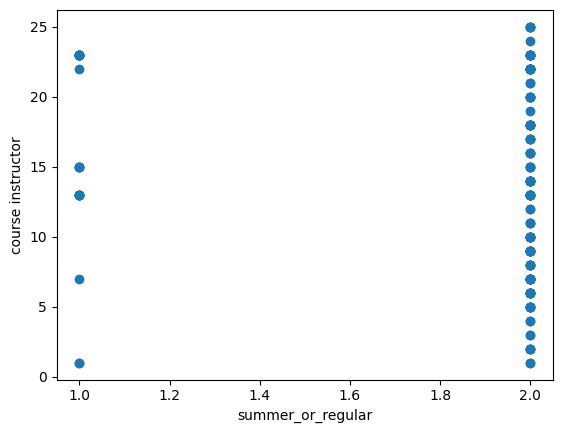

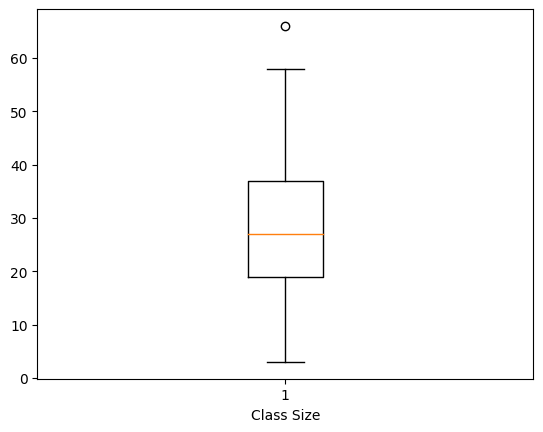

In [48]:

plt.hist(df['class_size'])
plt.xlabel('Class Size')
plt.ylabel('Frequency')
plt.show()

plt.scatter(df['summer_or_regular'], df['course_instructor'])
plt.xlabel('summer_or_regular')
plt.ylabel('course instructor')
plt.show()

plt.boxplot(df['class_size'])
plt.xlabel('Class Size')
plt.show()

## Preprocess

In [49]:
df = df.dropna()
print(df.isna().sum())
print(df.duplicated().sum())
df.size

native_english_speaker    0
course_instructor         0
course                    0
summer_or_regular         0
class_size                0
class_attribute           0
dtype: int64
41


906

In [50]:
# One-hot encoding using the get_dummies() method
df_encoded = pd.get_dummies(df, columns=['course_instructor', 'course', 'class_attribute'])
df_encoded.head()

,native_english_speaker,summer_or_regular,class_size,course_instructor_1,course_instructor_2,course_instructor_3,course_instructor_4,course_instructor_5,course_instructor_6,course_instructor_7,...,course_20,course_21,course_22,course_23,course_24,course_25,course_26,class_attribute_1,class_attribute_2,class_attribute_3
0,1,1,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2,33,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,2,55,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df_encoded['total_students'] = df_encoded['class_size'] + df_encoded['class_attribute_1'] + df_encoded['class_attribute_2'] + df_encoded['class_attribute_3']
df_encoded.head()

,native_english_speaker,summer_or_regular,class_size,course_instructor_1,course_instructor_2,course_instructor_3,course_instructor_4,course_instructor_5,course_instructor_6,course_instructor_7,...,course_21,course_22,course_23,course_24,course_25,course_26,class_attribute_1,class_attribute_2,class_attribute_3,total_students
0,1,1,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20
1,2,1,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,18
2,1,2,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,50
3,1,2,33,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,34
4,2,2,55,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,56


In [70]:
scaler = StandardScaler()
X = df_encoded.drop(['class_attribute_1', 'class_attribute_2', 'class_attribute_3'], axis=1)
X_scaled = scaler.fit_transform(X)
y = df_encoded[['class_attribute_1', 'class_attribute_2', 'class_attribute_3']]
y = np.argmax(y.values, axis=1)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Split the preprocessed data into training and testing sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [72]:
y_train

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0,
       2, 0, 2, 0, 1, 0, 1, 1, 2, 1])

## Train Model

In [73]:
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='ovr')
clf.fit(X_train, y_train)

/home/diptam.paul/Documents/PythonTasks/Samvidhi/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/diptam.paul/Documents/PythonTasks/Samvidhi/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

LogisticRegressionCV(cv=5, multi_class='ovr', random_state=0)

In [75]:
# SVM
clf1 = SVC(kernel='linear', C=1, random_state=0)
clf1.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=0)

In [76]:

# Random Forest
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Evaluation

In [79]:
#Logistic Regression Evaluation
y_pred = clf.predict(X_test)


# Calculate the classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.6774193548387096
Precision: 0.6964925755248336
Recall: 0.6774193548387096
F1-score: 0.6804174573055028


In [80]:
#Random Forest Evaluation
y_pred = clf2.predict(X_test)


# Calculate the classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7419354838709677
Precision: 0.7534562211981567
Recall: 0.7419354838709677
F1-score: 0.7354838709677419


In [81]:
#SVM Evaluation
y_pred = clf1.predict(X_test)


# Calculate the classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.6451612903225806
Precision: 0.6967741935483871
Recall: 0.6451612903225806
F1-score: 0.6465792272243885


## Storing the Random Forest Model

In [87]:
joblib.dump(clf, "models/logistic_regression_CV.sav")
joblib.dump(clf1, "models/svm_model.sav")
joblib.dump(clf2, "models/random_forest.sav")

['models/random_forest.sav']